# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
#Импортируем библиотеку для создания визуализации
import matplotlib.pyplot as plt

,Количество заемщиков,Доля должников
children,,
0,14091,0.075438
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000


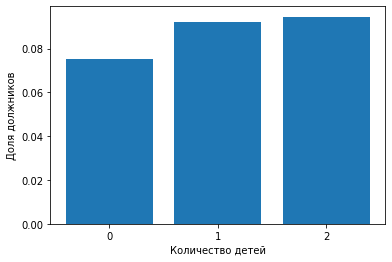

In [23]:
#Посчитаем общее количество должников для каждого количества детей и долю должников
data_children = data.groupby('children').agg({'debt': ['count', 'mean']})
#Переименуем столбцы для удобства
data_children.columns = ['Количество заемщиков', 'Доля должников']
#Выведем таблицу на экран
display(data_children)
#Построим график по значению из столбца 'Доля должников' от 0 до 2-х детей
x_bar = ['0', '1', '2']
y_bar = data_children.loc[0:2, 'Доля должников']
plt.bar(x_bar, y_bar)
#Добавим подписи для осей
plt.xlabel('Количество детей')
plt.ylabel('Доля должников')
plt.show()

**Вывод:** Для 3-х и более детей мы не можем делать выводы о доле должников, так как выборка слишком мала(для 5 детей - всего 9 человек, и ни одного должника). Тем не менее мы можем проанализировать количество должников в группах от 0 до 2-х детей. В этих группах с возрастанием количества детей увеличивается и доля должников. Значит есть прямая зависимость - чем больше детей, тем больше вероятность не вернуть кредит в срок.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,Количество заемщиков,Доля должников
family_status,,
Не женат / не замужем,2796,0.097639
гражданский брак,4134,0.093130
женат / замужем,12261,0.075606
в разводе,1189,0.070648
вдовец / вдова,951,0.066246


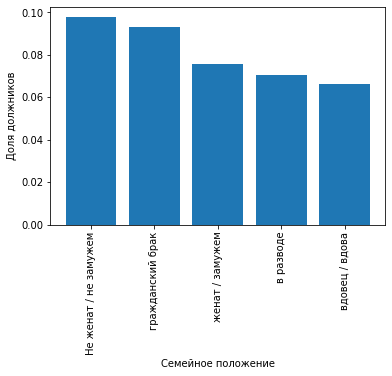

In [24]:
#Посчитаем общее количество должников для каждого семейного положения и долю должников
data_family_status = data.groupby('family_status').agg({'debt': ['count', 'mean']})
#Переименуем столбцы для удобства
data_family_status.columns = ['Количество заемщиков', 'Доля должников']
#Расположим долю должников в порядке убывания
data_family_status = data_family_status.sort_values(by='Доля должников', ascending=False)
#Выведем таблицу на экран
display(data_family_status)
#Построим график по значению из столбца 'Доля должников'
x_bar = ['Не женат / не замужем', 'гражданский брак', 'женат / замужем', 'в разводе', 'вдовец / вдова']
y_bar = data_family_status['Доля должников']
plt.bar(x_bar, y_bar)
plt.xticks(rotation=90)
#Добавим подписи для осей
plt.xlabel('Семейное положение')
plt.ylabel('Доля должников')
plt.show()

**Вывод:** Действительно, из таблицы видно, что если человек женат/замужем или был женат/замужем, то и процент невозврата кредита ниже, чем у остальных групп. Однако, проследить зависимость сложно, ведь среди людей проживающих в гражданском браке процент должников выше, чем у женатых/замужних. Но корреляция между семейным положением и возвратом кредита в срок есть. Скорее всего она связана с более ответственным подходом к финансам у людей бывших в браке.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,Количество заемщиков,Доля должников
total_income_category,,
A,25,0.080000
B,5014,0.070602
C,15921,0.084982
D,349,0.060172
E,22,0.090909


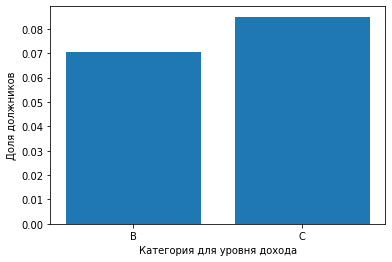

In [25]:
#Посчитаем общее количество должников для каждого уровня дохода и долю должников
data_total_income_category = data.groupby('total_income_category').agg({'debt': ['count', 'mean']})
#Переименуем столбцы для удобства
data_total_income_category.columns = ['Количество заемщиков', 'Доля должников']
#Выведем таблицу на экран
display(data_total_income_category)
#Построим график по значению из столбца 'Доля должников' для категорий B и C
x_bar = ['B', 'C']
y_bar = data_total_income_category.loc['B':'C', 'Доля должников']
plt.bar(x_bar, y_bar)
#Добавим подписи для осей
plt.xlabel('Категория для уровня дохода')
plt.ylabel('Доля должников')
plt.show()

**Вывод:** Для A, D и E категорий уровня дохода нет возможности провести анализ, так как выборка не репрезентативна. Мы можем провести анализ только по категориям B и C. Из таблицы видно, что для категории B с уровнем дохода от 200001 до 1000000 процент должников ниже, чем для категории С с более низким доходом. А это значит, что, чем выше доход тем ниже процент невозврата кредита.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,Количество заемщиков,Доля должников
purpose_category,,
операции с автомобилем,4279,0.093480
получение образования,3988,0.092528
проведение свадьбы,2313,0.079118
операции с недвижимостью,10751,0.072551


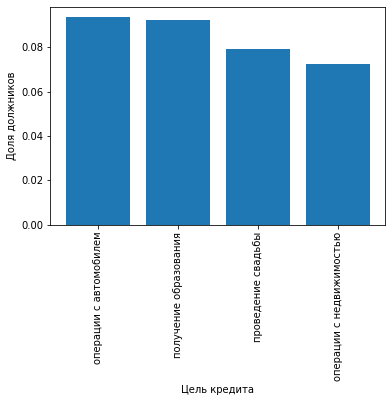

In [26]:
#Посчитаем общее количество должников для каждой цели кредита и долю должников
data_purpose_category = data.groupby('purpose_category').agg({'debt': ['count', 'mean']})
#Переименуем столбцы для удобства
data_purpose_category.columns = ['Количество заемщиков', 'Доля должников']
#Расположим долю должников в порядке убывания
data_purpose_category = data_purpose_category.sort_values(by='Доля должников', ascending=False)
#Выведем таблицу на экран
display(data_purpose_category)
#Построим график по значению из столбца 'Доля должников'
x_bar = ['операции с автомобилем', 'получение образования', 'проведение свадьбы', 'операции с недвижимостью']
y_bar = data_purpose_category['Доля должников']
plt.bar(x_bar, y_bar)
plt.xticks(rotation=90)
#Добавим подписи для осей
plt.xlabel('Цель кредита')
plt.ylabel('Доля должников')
plt.show()

**Вывод:** Здесь процент невозврата кредита у операций с автомобилем и получением образования больше, чем у целей проведение свадьбы и операции с недвижимостью. Возможно, это происходит потому, что люди более ответственно подходят к свадьбе и покупке жилья. Или же, это происходит из-за того, что операции с автомобилем связаны с риском поломки автомобиля, а получение образования не гарантирует трудоустройства. 

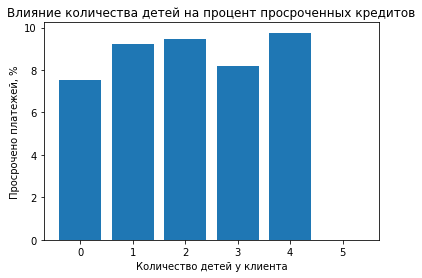

In [27]:
# Код ревьюера

import matplotlib.pyplot as plt

# группируем данные по количеству детей ('children'), затем применяем агрегирующие функции к столбцу 'debt'
grouped_data = data.groupby('children')['debt'].agg(['count', 'mean', 'sum'])
# функция reset_index используется для преобразования индекса в столбец данных
grouped_data.reset_index(inplace=True)
# используем график к таблице
plt.bar(grouped_data['children'], grouped_data['mean']*100) # умножаем на 100, чтобы перевести в проценты
# подписываем
plt.title("Влияние количества детей на процент просроченных кредитов")
plt.xlabel("Количество детей у клиента")
plt.ylabel("Просрочено платежей, %")
plt.xticks(grouped_data['children'])
plt.show()

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски произошли в столбцах с трудовым стажем и уровнем дохода. Они могли произойти потому, что эти люди еще не работали и ,соответственно, не имели ни стажа ни дохода.

Так же потеря данных могла произойти из-за технической ошибки на стадии ввода или сохранения данных в базе данных.

Одной из причин отсутствия данных может быть человеческий фактор во время заполнения данных.

Еще одной причиной может быть техническая ошибка при скачивании файла.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнить пропуски медианным значением лучше потому, что медианное значение более устойчиво к выбросам и аномальным значениям чем среднеарифметическое. Среднее значение сильно реагирует на выбросы, и его может "увести в сторону", например, если в отсортированном списке значений встречаются значения на порядок выше чем соседние. Тогда среднеарифметическое покажет больший результат из-за нескольких аномальных значений, которые не отражают всю выборку. Медианное же значение вырастет не сильно или вообще не вырастет из-за того, что берет серединные значения отсортированного столбца, где нет резких скачков в значениях.

### Шаг 4: общий вывод.

В ходе исследования мы изучили корреляции в данных, связанные с возвратом кредита в срок и выяснили зависимости между возвратом кредита и кредитными параметрами заемщика. Мы построили сводные таблицы отдельно по каждому вопросу и сравнивали данные на их основе. Для таблиц мы использовали данные из приложенного датасета data.csv. В датасете были описаны различные параметры заемщика, такие как: количество детей в семье, общий трудовой стаж в днях,  семейное положение, имел ли задолженность по возврату кредитов и др. 

Мы проверили четыре гипотезы и установили:
1. Чем больше детей тем меньше вероятность закрыть кредит в срок.
2. Если человек состоит или состоял в браке, у него больше вероятность закрыть кредит в срок.
3. Чем выше уровень дохода заемщика, тем выше вероятность закрыть кредит в срок.
4. Разные цели кредита влияют на вероятность закрыть кредит в срок. Это может быть связано с большей ответственностью клиента для некоторых целей, или с тем, что некоторые цели связаны с непредвиденными тратами или не приносят ожидаемого дахода.

Проанализировав эту информацию мы можем составить портреты "идеального" и "нежелательного" заемщиков.

Идеальным заемщиком будет человек без детей, состоящий или состоявший в браке, с максимально возможным уровнем дохода, берущий кредит на операции с недвижимостью.

Нежелательным заемщиком будет человек с большим количеством детей, холостой или живущий в гражданском браке, с уровнем дохода ниже среднего и берущий кредит на операции с автомобилем.

Можем порекомендовать заказчику ориентироваться на портреты "идеального" и "нежелательного" заемщиков при выдаче кредитов, выдавать в кредитный займ больше или меньше денежных средств соответственно, а так же собрать больше информации об уровне дохоода выше и ниже среднего для поиска корреляций и более точного анализа.